# Machine Learning

* 기계학습 및 인공지능에 대해서 설명하지 않음
    * 관심이 있다면 요즘 많은 무료 강의들이 있고 책도 많기에 따로 공부하기 바람
    * 본 강의에서는 분석한 데이터를 사용하여 결과를 만들어 내는 도구로써의 기계학습만을 다룸 

In [2]:
#pip install scikit-learn

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

* 사용할 알고리즘
    * Logistic Regression
    * Decision Tree
    * Random Forest

# Data analysis

* 롤 챌린저 게임 랭크 데이터 분석
* 많은 데이터를 수업 도중에 수집하기는 어렵기에 이미 수집된 데이터 사용
* ref
    > https://www.kaggle.com/datasets/gyejr95/league-of-legends-challenger-ranked-games2020

## Data information

* gameId: 고유 ID
* gameDuraton : 경기 시간(초단위)
* blueWins/ redWins: 승리 유무
* blueFirstBlood/ redFirstBlood: 퍼블 유무
* blueFirstTower/ redFirstTower: 포탑 선점 유무
* blueFirstBaron/ redFirstBaron: 바론 선점 유무
* blueFirstDragon/ redFirstDragon: 용 선점 유무
* blueFirstInhibitor/ redFirstInhibitor: 억제기 선점 유무
* blueDragonKills/ redDragonKills: 잡은 용의 수
* blueBaronKills/ redBaronKills: 잡은 바론의 수
* blueWardPlaced/ redWardPlaced : 설치한 와드의 개수
* blueWardkills/ redWardkills : 제거한 와드의 개수
* blueKills/ redKills : 팀의 킬 횟수
* blueDeath/ redDeath : 팀의 죽은 횟수
* blueAssist/ redAssist : 팀의 어시스트 횟수
* blueChampionDamageDealt/ redChampionDamageDealt : 상대팀에게 가한 피해량
* blueTotalGold/ redTotalGold : 총 골드량
* blueTotalMinionKills/ redTotalMinionKills : 잡은 미니언의 수
* blueTotalLevel/ redTotalLevel : 팀의 레벨 합
* blueAvgLevel/ redAvgLevel : 팀의 레벨 평균
* blueJungleMinionKills/ redJungleMinionKills : 잡은 정글 미니언의 수
* blueKillingSpree/ redKillingSpree : 팀의 연속 킬 횟수
* blueTotalHeal/redTotalHeal : 팀의 총 회복량
* blueObjectDamageDealt/redObjectDamageDealt : 팀이 오브젝트에 가한 피해량

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('Challenger_Ranked_Games.csv')

In [13]:
df

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455


In [17]:
df.info() # 결측치(Non-Null)가 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [21]:
blue_df = df.iloc[:, 1:26] # 전체 행의 1열부터 25열까지
red_df = pd.concat([df.iloc[:, 1], df.iloc[:, 26:]], axis=1)

In [22]:
blue_df

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,22,56039,37001,440,56,11.2,105,4,31035,5675
1,1317,1,0,0,0,1,0,2,0,4,...,31,60243,41072,531,63,12.6,111,3,26397,45303
2,932,0,0,0,0,0,0,0,0,0,...,8,24014,22929,306,42,8.4,64,0,6567,5651
3,2098,0,0,0,1,1,0,1,1,2,...,45,101607,63447,774,80,16.0,226,3,24718,31019
4,2344,1,1,1,1,1,1,2,2,11,...,47,134826,74955,831,83,16.6,252,5,37161,95287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,1468,0,1,0,0,0,0,1,0,0,...,50,99418,41437,438,60,12.0,106,8,20122,13309
26900,970,0,1,1,0,1,0,3,0,5,...,36,61816,61221,346,65,13.0,28,5,32837,44640
26901,1480,0,1,1,0,1,0,1,0,4,...,19,51604,45013,568,63,12.6,132,4,18131,45242
26902,1837,1,1,0,0,1,0,3,0,5,...,66,93059,58160,640,76,15.2,168,7,75427,60486


In [24]:
red_df

,gameDuraton,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,1,0,1,0,1,1,3,0,9,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,0,1,1,0,0,0,0,0,2,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,1,1,1,0,1,1,2,0,5,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,1,1,1,0,0,0,3,1,6,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,0,0,0,0,0,0,3,1,6,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,1468,1,0,1,0,1,0,2,0,4,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,970,1,0,0,0,0,1,0,0,10,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,1480,1,0,0,0,0,0,1,0,3,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,1837,0,0,1,1,0,0,2,1,4,...,29,88366,52625,660,70,14.0,168,5,25003,45455


In [26]:
for i in blue_df.iloc[:, 2:7].columns: # 2열부터 6열까지
    display(pd.crosstab(blue_df[i], blue_df['blueWins'], margins=True).style.background_gradient(cmap='Reds'))

blueWins,0,1,All
blueFirstBlood,,,
0,8066,5291,13357
1,5384,8163,13547
All,13450,13454,26904


blueWins,0,1,All
blueFirstTower,,,
0,9397,3366,12763
1,4053,10088,14141
All,13450,13454,26904


blueWins,0,1,All
blueFirstBaron,,,
0,12286,8051,20337
1,1164,5403,6567
All,13450,13454,26904


blueWins,0,1,All
blueFirstDragon,,,
0,9754,6218,15972
1,3696,7236,10932
All,13450,13454,26904


blueWins,0,1,All
blueFirstInhibitor,,,
0,12646,4381,17027
1,804,9073,9877
All,13450,13454,26904


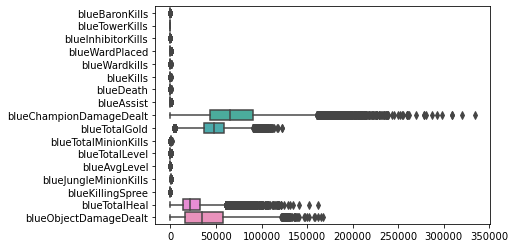

In [28]:
sns.boxplot(data=blue_df.iloc[:, 8:26], orient='h') # 아웃라이어가 개많음. 제거할 필요가 있음
plt.show()

In [29]:
for feature in ['blueChampionDamageDealt', 'blueTotalGold', 'blueTotalHeal', 'blueObjectDamageDealt']:
    q1 = blue_df[feature].quantile(0.25)
    q3 = blue_df[feature].quantile(0.75)
    iqr = q3 - q1

    condition=blue_df[feature] > (q3 + 1.5 * iqr)
    target=blue_df[condition].index
    blue_df.drop(target,inplace=True)

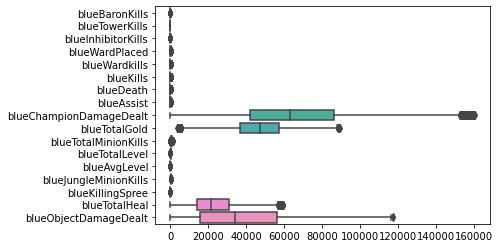

In [30]:
sns.boxplot(data=blue_df.iloc[:, 8:26], orient='h')
plt.show()

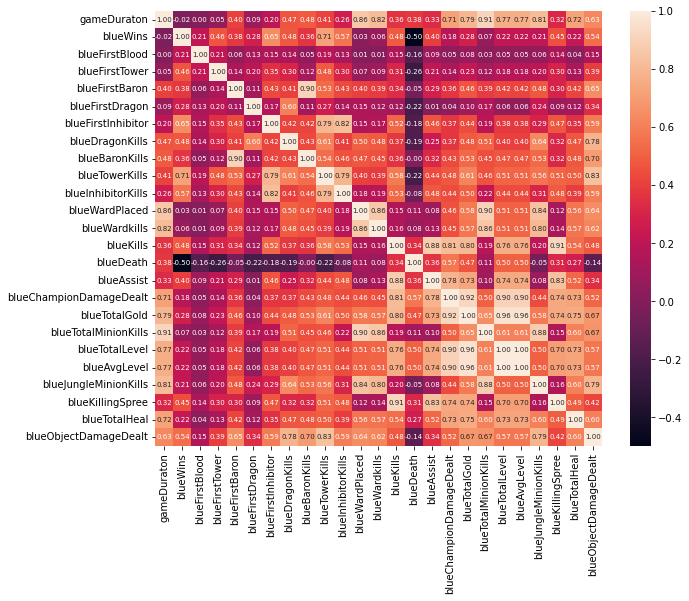

In [32]:
plt.figure(figsize=(10, 8)) # -1.0 : 비례, -0.4 : 반비례, 0 : 관련없음
sns.heatmap(data=blue_df.corr(), annot=True, annot_kws={"size": 7}, fmt=".2f")
plt.show()

# Learning

## Feature selection

* blueDeath를 포함하면 정확도 매우 향상
    * 처음엔 없이 해볼 것

In [7]:
corr1 = blue_df.corr().loc['blueWins'][blue_df.corr().loc['blueWins'] >= 0.375].index
corr2 = blue_df.corr().loc['blueWins'][blue_df.corr().loc['blueWins'] <= -0.375].index
corr = np.append(corr1, corr2)
#corr = corr1 피쳐엔지니어링>? 을 잘 해야 결과가 잘 나옴
corr

NameError: name 'blue_df' is not defined

corr = blue_df.corr().loc['blueWins'][blue_df.corr().loc['blueWins'] >= 0.375].index
corr

In [6]:
blue_df[corr[1:]]

NameError: name 'blue_df' is not defined

## Split data

In [54]:
x = blue_df[corr[1:]]
y = blue_df['blueWins']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

## Train and Test

### Logistic Regression

In [55]:
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)

lr_predict = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predict)
lr_accuracy

0.9632080981117384

### Decision Tree

In [56]:
dt = DecisionTreeClassifier(max_depth=7) # max_depth : pruning (가지치기)
dt.fit(x_train, y_train)

dt_predict = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_predict)
dt_accuracy

0.9608721043410551

### Random Forest

In [72]:
rf = RandomForestClassifier(n_estimators=200) # n_estimators : 나무 200개 심는 거임 다주결에 의해 승승패승패를 승으로 결론짓는 것
rf.fit(x_train, y_train)

rf_predict = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predict)
rf_accuracy

0.9700214132762313

# Result Visualization

In [73]:
def cmatrix(target, prediction, title):
    c_matrix = np.zeros([2, 2]).astype(np.int64)

    for i in range(target.shape[0]):
        idx_target = np.abs(target[i].astype(int) - 1)
        idx_output = np.abs(prediction[i].astype(int) - 1)

        c_matrix[idx_target, idx_output] += 1

    c_matrix_frame = pd.DataFrame(c_matrix, index=['Actual(P)', 'Actual(N)'], columns=['Predicted(P)', 'Predicted(N)'])

    plt.figure(figsize=(4, 3))
    plt.title(title)
    sns.heatmap(c_matrix_frame, annot = True, fmt = 'd',cmap = 'Reds')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0.5, 1.5],['P', 'N'])
    plt.yticks([0.5, 1.5],['P', 'N'])
    plt.show()
    
    TP = c_matrix[0][0]
    FP = c_matrix[1][0]
    FN = c_matrix[0][1]
    TN = c_matrix[1][1]
    
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    Specificity = TN / (TN + FP)
    F1_score = 2 * (Precision * Recall) / (Precision + Recall)
    print('Accuracy:', Accuracy)
    print('Precision:', Precision)
    print('Recall:', Recall)
    print('Specificity:', Specificity)
    print('F1_score:', F1_score)

## Logistic Regression

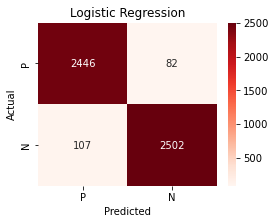

Accuracy: 0.9632080981117384
Precision: 0.9580885233059147
Recall: 0.9675632911392406
Specificity: 0.9589881180528939
F1_score: 0.9628025979137966


In [64]:
cmatrix(np.array(y_test), lr_predict, 'Logistic Regression') # 컨퓨전 매트릭스
#대각선으로 진하면 잘 나온 것임

## Decision Tree

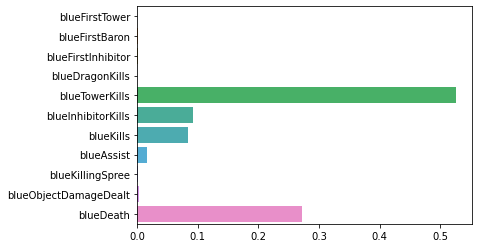

In [74]:
sns.barplot(x=dt.feature_importances_, y=x_train.columns)
plt.show()

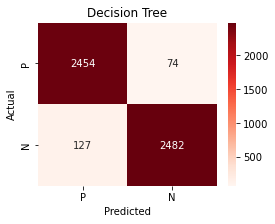

Accuracy: 0.9608721043410551
Precision: 0.950794265788454
Recall: 0.9707278481012658
Specificity: 0.9513223457263319
F1_score: 0.9606576629477392


In [66]:
cmatrix(np.array(y_test), dt_predict, 'Decision Tree')

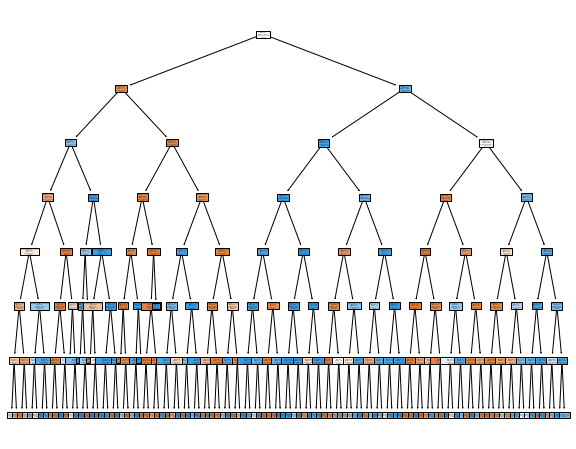

In [68]:
from sklearn import tree
plt.figure(figsize=(10, 8))
tree.plot_tree(dt, feature_names = x_test.columns, class_names = np.unique(y_test.astype('str')), filled=True)
plt.show()

## Random Forest

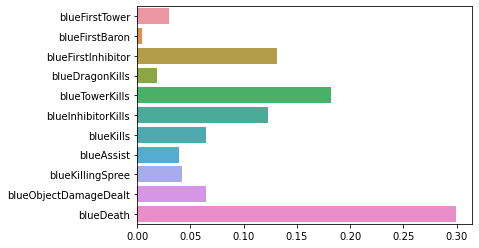

In [69]:
sns.barplot(x=rf.feature_importances_, y=x_train.columns)
plt.show()

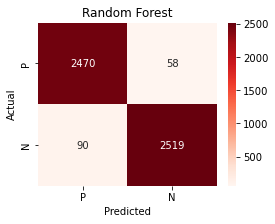

Accuracy: 0.9711894101615729
Precision: 0.96484375
Recall: 0.9770569620253164
Specificity: 0.9655040245304715
F1_score: 0.9709119496855345


In [70]:
cmatrix(np.array(y_test), rf_predict, 'Random Forest')

# Application

* 그랜드 마스터 데이터에 모델 적용하기

In [85]:
adf = pd.read_csv('GrandMaster_Ranked_Games.csv')

In [86]:
ablue_df = adf.iloc[:, 1:26]

In [87]:
ablue_df

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,2098,0,0,0,1,1,0,1,1,2,...,45,101607,63447,774,80,16.0,226,3,24718,31019
1,1686,0,0,1,0,0,0,0,0,2,...,30,70270,47107,601,65,13.0,136,5,20503,31788
2,1588,1,1,1,1,0,1,2,1,10,...,88,102449,59163,613,71,14.2,157,7,28612,67404
3,1126,1,0,1,0,1,0,1,0,4,...,34,56652,39014,486,57,11.4,115,5,17630,37483
4,1262,1,0,0,0,1,1,3,0,7,...,38,57342,42933,509,61,12.2,129,4,13040,48691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65891,1928,0,1,0,0,0,0,2,0,3,...,40,97060,61378,771,76,15.2,177,4,23467,31943
65892,1837,1,1,0,0,1,0,3,0,5,...,66,93059,58160,640,76,15.2,168,7,75427,60486
65893,948,1,1,1,0,0,0,1,0,4,...,19,22427,30001,399,50,10.0,89,3,10791,24827
65894,2479,1,1,0,0,0,0,3,1,7,...,83,142725,82466,803,89,17.8,251,13,67496,98972


In [102]:
ablue_df
x = ablue_df[corr[1:]]
y = ablue_df['blueWins']
Logistic Regression
alr_predict = lr.predict(x)
alr_accuracy = accuracy_score(y, alr_predict)x = ablue_df[corr[1:]]
y = ablue_df['blueWins']

SyntaxError: invalid syntax (4154721423.py, line 4)

### Logistic Regression

In [101]:
alr_predict = lr.predict(x)
alr_accuracy = accuracy_score(y, alr_predict)
alr_accuracy

0.9537756464732305

### Decision Tree

In [80]:
adt_predict = dt.predict(x)
adt_accuracy = accuracy_score(y, adt_predict)
adt_accuracy

0.9581765205778803

### Random Forest

In [82]:
arf_predict = rf.predict(x)
arf_accuracy = accuracy_score(y, arf_predict)
arf_accuracy

0.9698767755250698

In [2]:
import pandas as pd
import numpy as np
import os

forders = os.listdir('hello')
print(forders)

['Challenger_Ranked_Games.csv', 'GrandMaster_Ranked_Games.csv']


In [4]:
df_all = pd.DataFrame()
for i in range(0,len(forders)):
    if forders[i].split('.')[1] == 'csv':
        file = 'hello/'+forders[i]
        df= pd.read_csv(file,encoding='utf-8') 
        df_all = pd.concat([df_all, df])

In [5]:
df_all

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65891,3868504952,1928,0,1,0,0,0,0,2,0,...,60,94554,72361,804,80,16.0,209,10,57739,72450
65892,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455
65893,4100240254,948,1,1,1,0,0,0,1,0,...,3,16574,20972,351,40,8.0,56,0,7138,6808
65894,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124


In [34]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import chromedriver_autoinstaller
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import requests
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

#font_path = "C:/Windows/Fonts/malgun"
#font = font_manager.FontProperties(fname=font_path).get_name()
#rc('font', family=font)

In [53]:
import requests
from urllib import parse
import time

In [54]:
api_key = 'RGAPI-cfbd0526-fa24-4bff-ae82-c2e42d212fc2'

In [55]:
summoner_name = "악어는죽지않는다"
url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + summoner_name +'?api_key=' + api_key
summoner_info = requests.get(url).json()
summoner_info

{'id': 'D6JwpXcDb2NOG4oTLtft_gzpOea0Y3uUx8ggyoeKezF9MA',
 'accountId': 'm0ygf_4sgNgpJ1GzExGzEDwVywfAbRmzrmTAgkwIFHfQ',
 'puuid': 't3Y5MBIMZYRqP3Wx_IYC-64pzCUhC2mF4an4g7JKH9HnOr8nRjefCr1cdtHt5pw5jWE1jt_l8bC0jQ',
 'name': '악어는죽지않는다',
 'profileIconId': 5489,
 'revisionDate': 1675264770000,
 'summonerLevel': 193}

In [56]:
request_headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9,ko-KR;q=0.8,ko;q=0.7",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": "RGAPI-6840792e-23cc-4695-afbc-b4955709159a"
}

In [57]:
def check_my_team(*args):
    current_players = []
    for n in range(0, 4):
        name = args[n]
        print(name)
        encoded_name = parse.quote(name)
        current_players.append(encoded_name)
        summoner_account_id = requests.get("https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + encoded_name, headers=request_headers).json()["accountId"]
        win = 0
        for n in range(0, 10):
            get_latest_match_id = requests.get("https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/" + summoner_account_id, headers=request_headers).json()["matches"][n]["gameId"]
            get_match_info = requests.get("https://kr.api.riotgames.com/lol/match/v4/matches/" + str(get_latest_match_id), headers=request_headers).json()
            for i in range(0, 10):
                if get_match_info["participantIdentities"][i]["player"]["summonerName"] == name:
                    if get_match_info["participants"][i]["stats"]["win"] == True:
                        win += 1
            time.sleep(1)
        print(win)
        time.sleep(2)
            
        latest_players = []
        for n in range(0, 10):
            get_latest_match_id = requests.get("https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/" + summoner_account_id, headers=request_headers).json()["matches"][0]["gameId"]
            get_match_info = requests.get("https://kr.api.riotgames.com/lol/match/v4/matches/" + str(get_latest_match_id), headers=request_headers).json()
            latest_players.append(get_match_info["participantIdentities"][n]["player"]["summonerName"])
            time.sleep(1)
        print(latest_players)
        if len(set(current_players) & set(latest_players)) > 1:
            print(set(current_players) & set(latest_players))
        else:
            print("듀오가 없습니다")
        time.sleep(2)

In [59]:
check_my_team("내 팀원1","내 팀원2","내 팀원3", "내 팀원4")
 
def check_members():
    print("시작")
    live_game = requests.get("https://kr.api.riotgames.com/lol/spectator/v4/active-games/by-summoner/E1AfcxGWK9MaVl7tn6uMcdFNLEFKh3gx3cAEhrm4Wq0iDQ", headers=request_headers)
    live_game = live_game.json()
    current_players = []
    print("진행중")
    print(live_game)
    for n in range(0, 10):
        print("??")
        name = parse.quote(live_game["participants"][n]["summonerName"])
        print(name)
        current_players.append(name)
        summoner_account_id = requests.get("https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + name, headers=request_headers).json()["accountId"]
        get_latest_match_id = requests.get("https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/" + summoner_account_id, headers=request_headers).json()["matches"][0]["gameId"]
        get_match_info = requests.get("https://kr.api.riotgames.com/lol/match/v4/matches/" + str(get_latest_match_id), headers=request_headers).json()
        latest_players = []
        for n in range(0, 10):
            latest_players.append(get_match_info["participantIdentities"][n]["player"]["summonerName"])
            if len(set(current_players) & set(latest_players)) > 1:
                print(set(current_players) & set(latest_players))
        time.sleep(2)
 
check_members()

내 팀원1


KeyError: 'accountId'